In [1]:
import numpy as np
from scipy import integrate
from scipy.integrate import odeint
import matplotlib.pyplot as plt
%matplotlib notebook

## $m_2a = - \frac{Gm_1m_2}{r^2}$ 
## We can rewrite this as:
## * $\dot{x} = \frac{dx}{dt} = v_x$
## * $\ddot{x} = \frac{d^2x}{dt^2} = \frac{dv_x}{dt} = -\frac{GM_E}{r^{3/2}}x$

In General

## * $\vec{\dot{u}} = \vec{v}$
## * $\vec{\ddot{u}} = -\frac{GM_E}{r^{3/2}}\vec{u}$


## Complete the function below where we will treat state as a vector containing 6 elements:

## $$state = [x,y,z,v_x,v_y,v_z]$$

In [2]:
def model_2BP(t,state):
    ME = 5.98E+24
    G  = 6.67E-11 
    mu = ME*G*1E-9  # Earth's gravitational parameter = M*G  
                          # [km^3/s^2]
    x = state[0] #array of x values for a time increment
    y = state[1]
    z = state[2]
    r = np.sqrt(x**2+y**2+z**2)
    
    x_dot = state[3]
    y_dot = state[4]
    z_dot = state[5]
    
    x_ddot = -(mu/r**3)*x
    y_ddot = -(mu/r**3)*y
    z_ddot = -(mu/r**3)*z
    
    dstate_dt = [x_dot, y_dot, z_dot, x_ddot, y_ddot, z_ddot]
    return dstate_dt

## We will look at the orbit of the Internation Space Station. The initial conditons are defined below

In [3]:
# Initial Conditions / ISS
X_0 = -2775.03475
Y_0 = 4524.24941
Z_0 = 4207.43331
VX_0 = -3.641793088
VY_0 = -5.665088604
VZ_0 =  3.679500667

t0 = 0
tf = 21600

state_0 = [X_0, Y_0, Z_0, VX_0, VY_0, VZ_0]

time = np.linspace(t0,tf,num = 2000)



 ### 1. Create an crete an initial state vector called $\it{\mathrm{state\_0}}$ array containing the initial position and veolcity information.
 ### 2. Then define a time array using $\it{\mathrm{linspace}}$ that starts at 0s and covers 21,600s containing 2000 points 
 ### 3. Use Scipy's $\it{\mathrm{integrate.solve\_ivp}}$ to solve the ODEs

In [4]:
timeARR = integrate.solve_ivp(model_2BP, (t0, tf), state_0, method = 'RK45', t_eval = time)

print(timeARR)

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  1.081e+01 ...  2.159e+04  2.160e+04]
        y: [[-2.775e+03 -2.814e+03 ...  3.127e+03  3.106e+03]
            [ 4.524e+03  4.463e+03 ...  2.428e+03  2.511e+03]
            ...
            [-5.665e+00 -5.727e+00 ...  7.673e+00  7.602e+00]
            [ 3.680e+00  3.621e+00 ...  3.626e+00  3.728e+00]]
      sol: None
 t_events: None
 y_events: None
     nfev: 230
     njev: 0
      nlu: 0


# Analyze the Results

Make plots of X vs. time
1. X vs. time, Y vs, time, Z vs. time
2. X vs. Y, X vs. Z, Y vs. Z


<IPython.core.display.Javascript object>


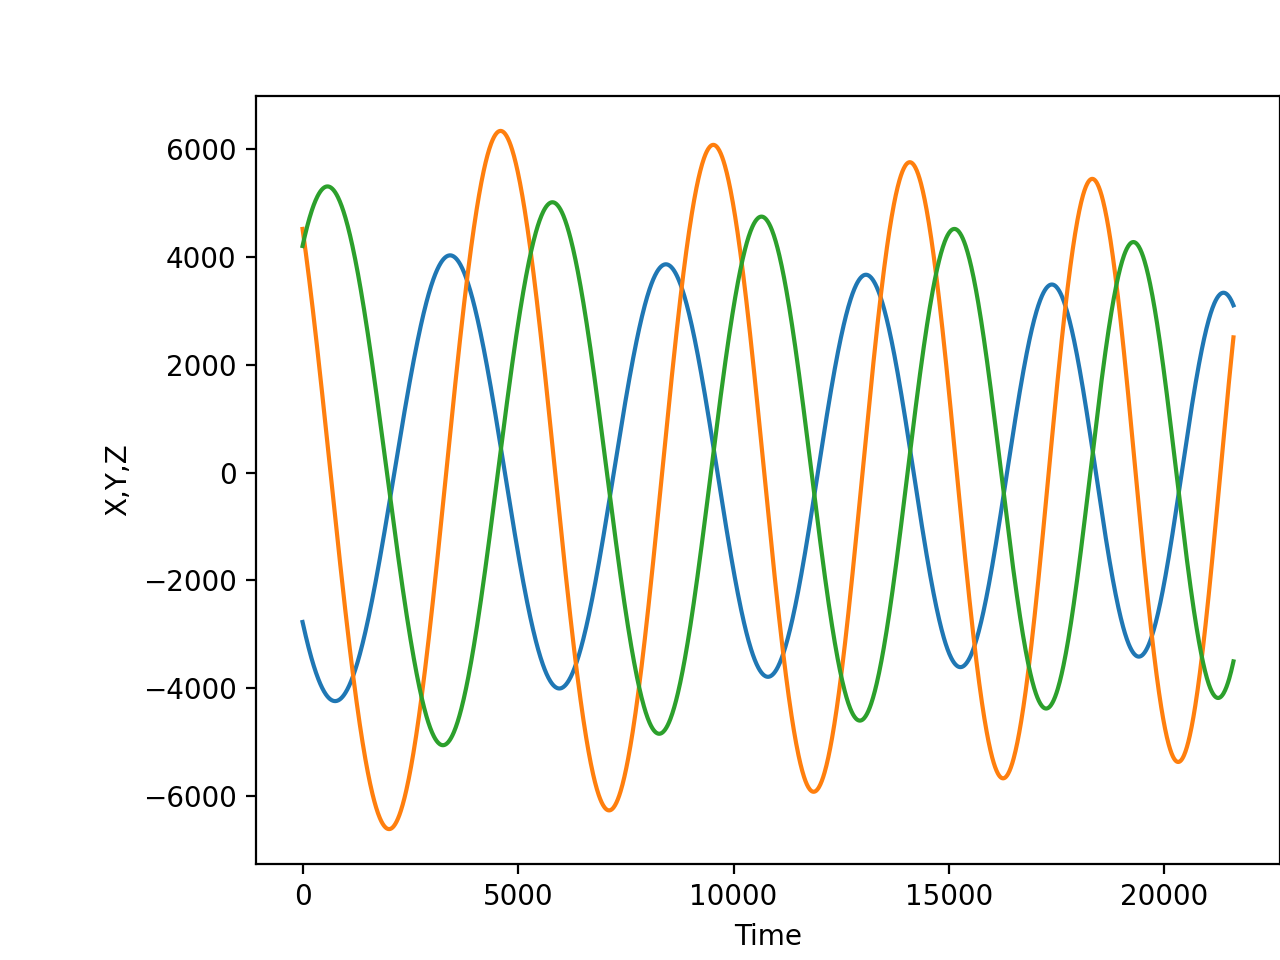

Text(0, 0.5, 'X,Y,Z')

In [5]:
fig = plt.figure()
ax = fig.add_axes([0.2,0.1,0.8,0.8])
ax.plot(timeARR.t,timeARR.y[0])
ax.plot(timeARR.t,timeARR.y[1])
ax.plot(timeARR.t,timeARR.y[2])
ax.set_xlabel('Time')
ax.set_ylabel('X,Y,Z')


# 3D Plot

Make a 3D plot showing the 3D trajectory of the ISS


<IPython.core.display.Javascript object>


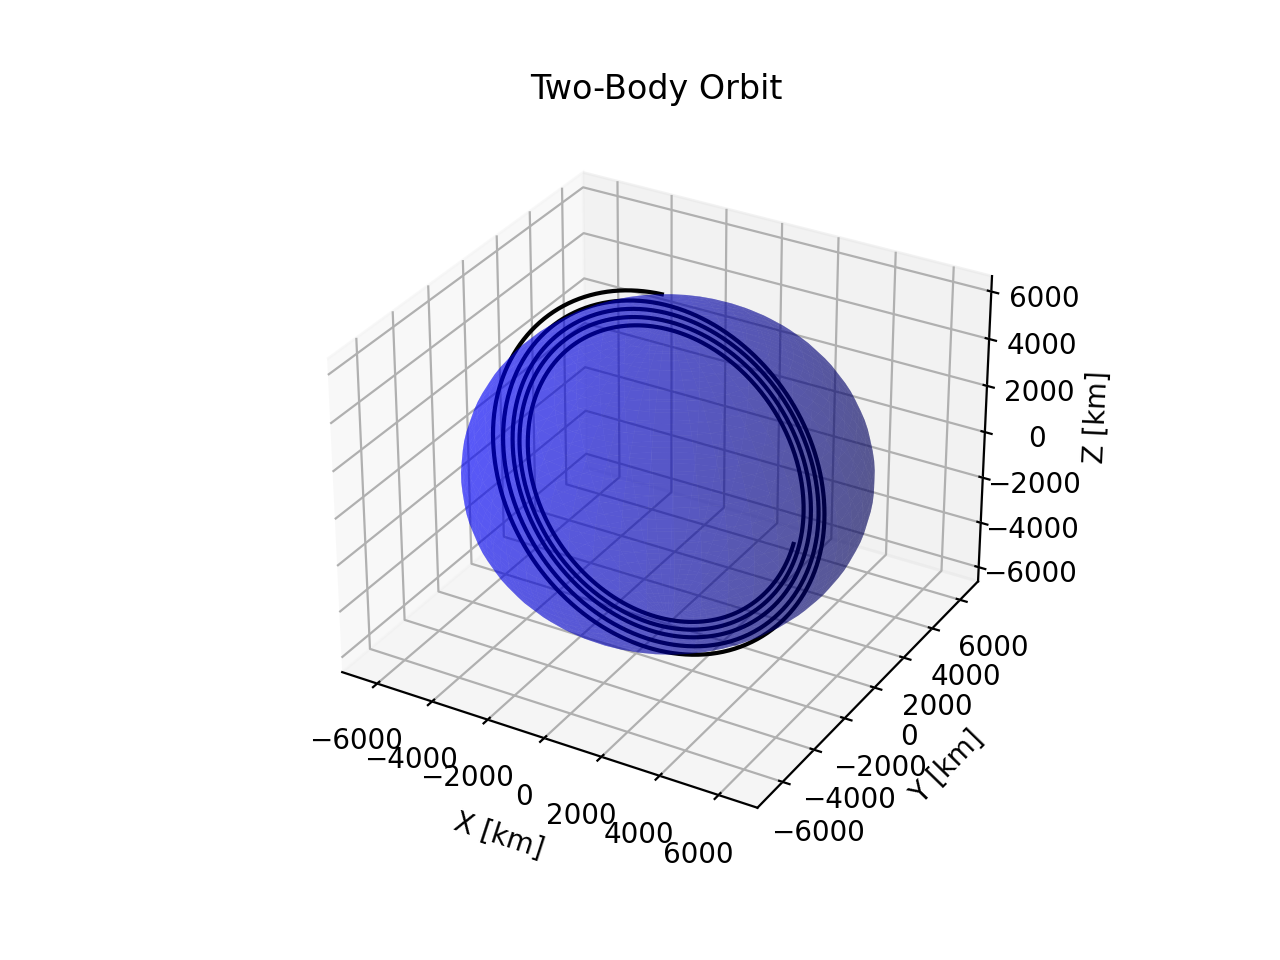

In [7]:
# Setting up Spherical Earth to Plot
N = 50
phi = np.linspace(0, 2 * np.pi, N)
theta = np.linspace(0, np.pi, N)
theta, phi = np.meshgrid(theta, phi)

r_Earth = 6378.14  # Average radius of Earth [km]
X_Earth = r_Earth * np.cos(phi) * np.sin(theta)
Y_Earth = r_Earth * np.sin(phi) * np.sin(theta)
Z_Earth = r_Earth * np.cos(theta)

# Plotting Earth and Orbit
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X_Earth, Y_Earth, Z_Earth, color='blue', alpha=0.4)

#you need to redefine x_sat,y_sat, and z_sat to use your x,y,z solution array names
ax.plot3D(timeARR.y[0], timeARR.y[1], timeARR.y[2], 'black')

#ax.view_init(30, 145)  # Changing viewing angle (adjust as needed)
plt.title('Two-Body Orbit')
ax.set_xlabel('X [km]')
ax.set_ylabel('Y [km]')
ax.set_zlabel('Z [km]');
